Osnabrück University - Computer Vision (Winter Term 2024/25) - Dr. Ulf Krumnack, Lukas Niehaus, Robin Rawiel

# Exercise Sheet 04: Color and segmentation

## Introduction

This week's sheet should be solved and handed in before the end of **Monay, December 9th, 2024**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (the exponential function) [0 Points]

This exercise is supposed to be basic (but maybe less familiar than the last one), does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up (again). You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

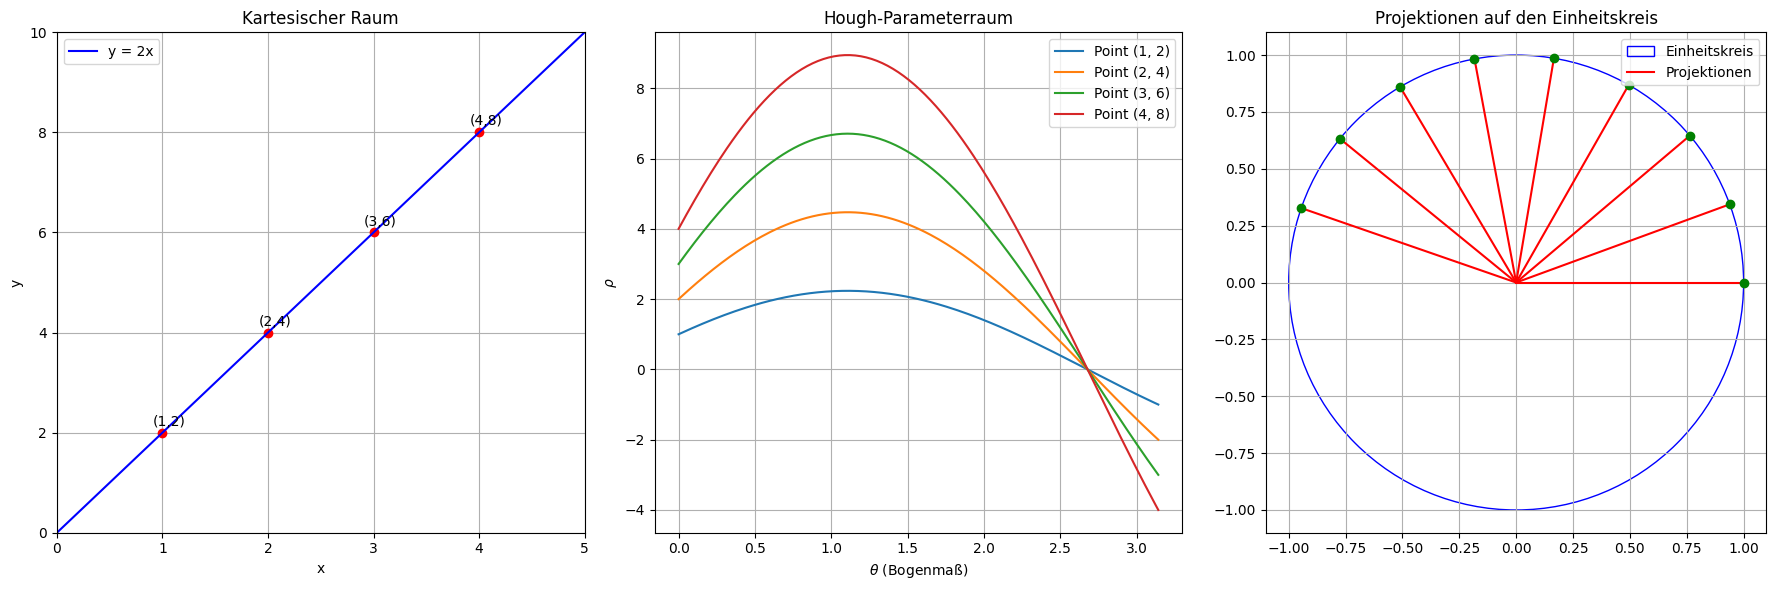

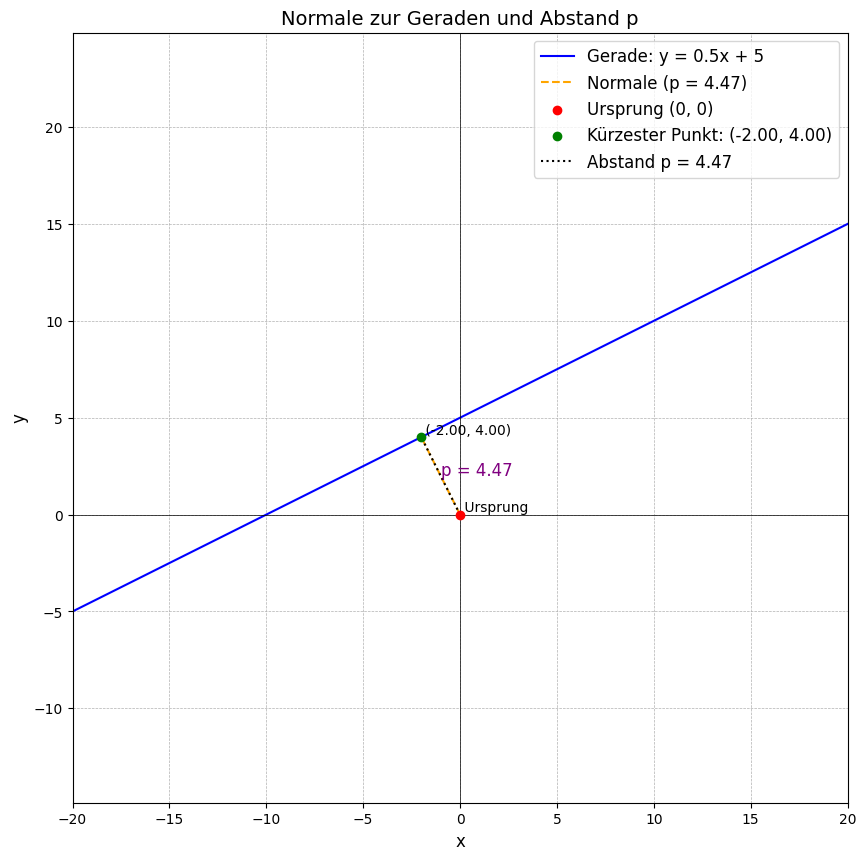

In [3]:

import numpy as np
import matplotlib.pyplot as plt

# Funktion für Hough-Transformation
def hough_transform(points, theta_steps=180):
    thetas = np.linspace(0, np.pi, theta_steps)
    rhos = []
    for x, y in points:
        rho = x * np.cos(thetas) + y * np.sin(thetas)
        rhos.append(rho)
    return np.array(rhos), thetas

# Punkte auf der Geraden y = 2x
points = [(1, 2), (2, 4), (3, 6), (4, 8)]  # Punkte der Geraden
rhos, thetas = hough_transform(points)

# Erstelle die Figuren
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Kartesischer Raum (linkes Diagramm)
axes[0].set_title("Kartesischer Raum")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].grid(True)
axes[0].set_xlim(0, 5)
axes[0].set_ylim(0, 10)

# Punkte und Gerade
for x, y in points:
    axes[0].plot(x, y, 'ro')  # Punkte
    axes[0].annotate(f"({x},{y})", (x, y), textcoords="offset points", xytext=(5, 5), ha='center')
x_vals = np.linspace(0, 5, 100)
y_vals = 2 * x_vals
axes[0].plot(x_vals, y_vals, 'b-', label="y = 2x")
axes[0].legend()

# Hough-Parameterraum (mittleres Diagramm)
axes[1].set_title("Hough-Parameterraum")
axes[1].set_xlabel(r"$\theta$ (Bogenmaß)")
axes[1].set_ylabel(r"$\rho$")
axes[1].grid(True)
for i, rho in enumerate(rhos):
    axes[1].plot(thetas, rho, label=f'Point {points[i]}')
axes[1].legend()

# Einheitskreis (rechtes Diagramm)
axes[2].set_title("Projektionen auf den Einheitskreis")
axes[2].set_aspect('equal', 'box')
axes[2].set_xlim(-1.1, 1.1)
axes[2].set_ylim(-1.1, 1.1)
axes[2].grid(True)
axes[2].add_artist(plt.Circle((0, 0), 1, color='blue', fill=False, label="Einheitskreis"))
for theta in thetas[::20]:  # Einige diskrete Theta-Werte zur Veranschaulichung
    x_proj = np.cos(theta)
    y_proj = np.sin(theta)
    axes[2].plot([0, x_proj], [0, y_proj], 'r-')  # Linie vom Ursprung zur Projektion
    axes[2].plot(x_proj, y_proj, 'go')  # Punkt auf dem Kreis
axes[2].legend(["Einheitskreis", "Projektionen"], loc="upper right")

plt.tight_layout()
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Parameter der Gerade
m = 0.5  # Steigung der Geraden (flachere Steigung für bessere Visualisierung)
b = 5    # Achsenabschnitt der Geraden (weiter entfernt vom Ursprung)

# Berechnung des Abstands p der Normalen vom Ursprung zur Geraden
p = abs(b) / np.sqrt(1 + m**2)  # Abstand der Normalen
theta = np.arctan(m)  # Winkel der Geraden mit der x-Achse

# Punkt auf der Geraden, der den kürzesten Abstand vom Ursprung hat
x_closest = -b * m / (1 + m**2)
y_closest = b / (1 + m**2)

# Grenzen für die Gerade
x_values = np.linspace(-20, 20, 400)
y_values = m * x_values + b  # Gerade: y = mx + b

# Berechnung der Normale (sie verläuft durch den Ursprung und den Punkt (x_closest, y_closest))
normal_slope = -1 / m  # Steigung der Normalen (senkrecht zur Geraden)
normal_x = np.array([0, x_closest])
normal_y = np.array([0, y_closest])

# Plot
plt.figure(figsize=(10, 10))

# Plot der Geraden
plt.plot(x_values, y_values, label=f'Gerade: y = {m}x + {b}', color='blue')

# Plot der Normalen
plt.plot(normal_x, normal_y, '--', label=f'Normale (p = {p:.2f})', color='orange')

# Markierung des Ursprungs
plt.scatter(0, 0, color='red', label='Ursprung (0, 0)', zorder=5)
plt.text(0, 0, ' Ursprung', fontsize=10, verticalalignment='bottom', horizontalalignment='left')

# Markierung des kürzesten Punktes
plt.scatter(x_closest, y_closest, color='green', label=f'Kürzester Punkt: ({x_closest:.2f}, {y_closest:.2f})', zorder=5)
plt.text(x_closest, y_closest, f' ({x_closest:.2f}, {y_closest:.2f})', fontsize=10, verticalalignment='bottom')

# Markierung des Abstands p
plt.plot([0, x_closest], [0, y_closest], 'k:', label=f'Abstand p = {p:.2f}')
plt.text(x_closest / 2, y_closest / 2, f'p = {p:.2f}', fontsize=12, color='purple')

# Titel und Legende
plt.title('Normale zur Geraden und Abstand p', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.axis('equal')
plt.xlim(-20, 20)
plt.ylim(-10, 20)

# Plot anzeigen
plt.show()

**a)** What is an *exponential function*? How can it be characterized? What is special about $e^x$?

**b)** How is the exponential function defined for complex arguments? In what way(s) does this generalize the real case?

YOUR ANSWER HERE

**c)** The complex exponential function allows to define a mapping $\mathbb{R}\to\mathbb{C}$ by $x\mapsto e^{ix}$? How does the graph of this mapping look like? Where are the points $e^{2\pi i\frac mn}$ for $m=0,...,n\in\mathbb{N}$ located on this graph?

YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Assignment 1: Implementation: Skeletonization (5 points)

### a) Skeletonization with hit-or-miss

Explain in your own words, how the hit-or-miss operator can be used for skeletonization (cf CV-05 slide 39).  

YOUR ANSWER HERE

### b) Implementation of skeletonization

Now use this method to implement your own skeletonization function. It is ok to use
`scipy.ndimage.morphology.binary_hit_or_miss` here (but of course *not* `skimage.morphology.skeletonize` or similar functions). Compare your result with (CV-05 slide 40). Note that computing the skeleton using this method may take some time ...

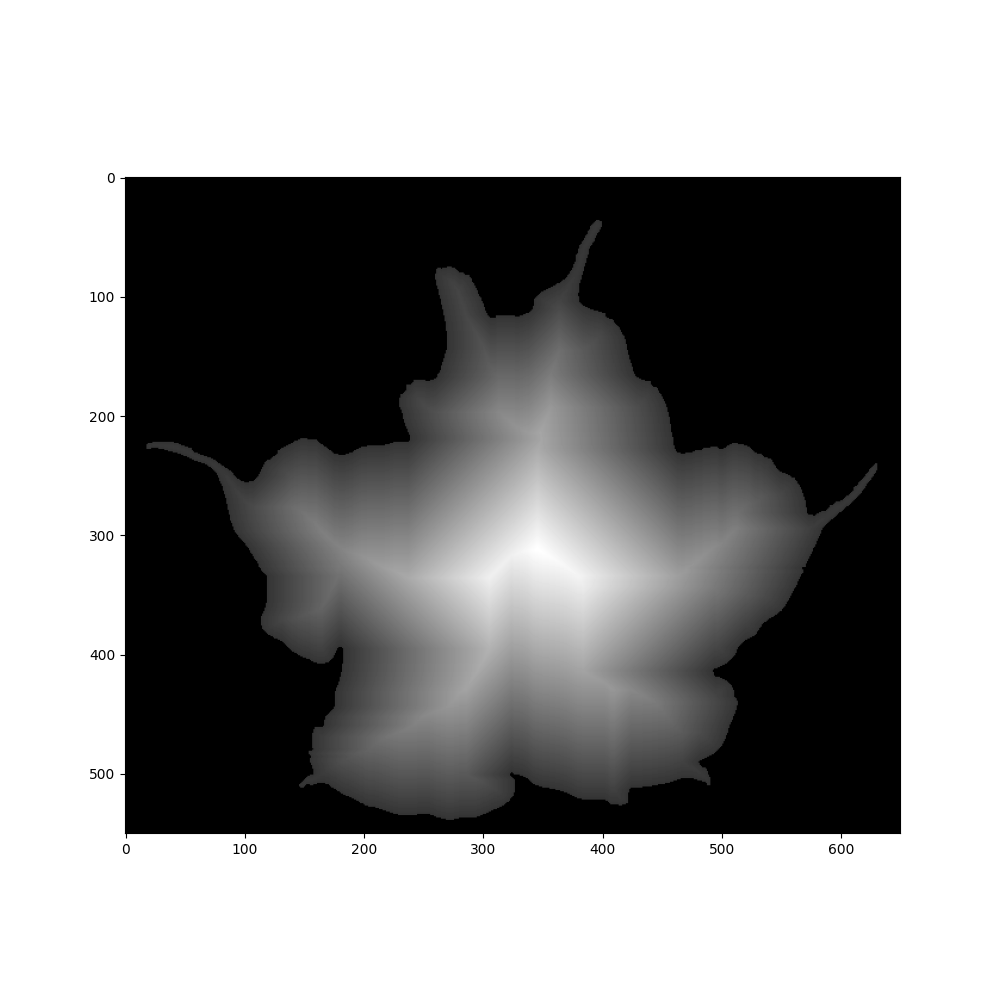

In [9]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_hit_or_miss, distance_transform_cdt, binary_dilation
from imageio.v3 import imread

def my_skeletonize(img):
    """
    Compute the skeloton of a binary image using hit_or_miss operator.
    
    Parameters
    ----------
    img : ndarray of bools
        Binary image to be skeletonized.
    
    Returns
    -------
    skeleton : ndarray of bools
        The skeleton of the input image.
    """
    # Define the structuring elements (masks) for hit-or-miss transformation
    mask1 = np.array([[0, 1, 0],
                      [0, 1, 0],
                      [1, 1, 1]], dtype=bool)  # Mask for detecting edges
    mask2 = np.array([[1, 1, 1],
                      [0, 1, 0],
                      [0, 0, 0]], dtype=bool)  # Mask for detecting background
    
    # Initialize the skeleton as an empty array
    skeleton = np.zeros_like(img, dtype=bool)
    
    # Perform the skeletonization by iteratively applying hit-or-miss
    while True:
        # Apply hit-or-miss to find the current skeleton parts
        hit_miss = binary_hit_or_miss(img, mask1, mask2)
        
        # If no new pixels are found, we're done
        if not hit_miss.any():
            break
        
        # Add the detected parts to the skeleton
        skeleton |= hit_miss
        
        # Remove the detected parts from the image to continue the process
        img[hit_miss] = 0
    
    return skeleton

img = imread("images/engelstrompete.png") > 0
skel = my_skeletonize(img)
result = distance_transform_cdt(img, metric='taxicab') + (50 * img)
result[binary_dilation(skel)] = 0
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(result)
#plt.imshow(img)
plt.show()

## Assignment 2: Hough transform (5 points)

**a)** Explain in your own words the idea of Hough transform in general. What is an accumulator space? In what sense can the Hough transform be seen as a model-based approach?


The **Hough Transform** is a technique used for detecting geometric shapes, particularly **lines** and **circles**, in an image. The idea is to transform points from the image space into a **parameter space** (also called the **Hough space**), where shapes can be represented as points or curves. This allows us to find patterns (like lines or circles) by detecting peaks in the transformed space.

#### Accumulator Space

The **accumulator space** is a multi-dimensional parameter space where each dimension corresponds to a parameter of the geometric shape being detected. For example:
- For lines, the parameters are **distance** $ \rho $ and **angle** $ \theta $.
- For circles, the parameters are the **center coordinates** $ a $, $ b $ and **radius** $ r $.

Each point in the image "votes" in the accumulator space for all the possible shapes it could belong to. When several points in the image align (e.g., they lie on the same line), their votes accumulate at a specific point in the accumulator space, indicating the presence of that shape.

#### Model-Based Approach

It can be seen as a **model-based approach** because it systematically tests a range of theoretical models (such as lines or circles) with different parameters and compares them to the image data. Instead of directly detecting shapes in the image space, the algorithm searches for the **parameters** of the shape in a parametric space. For each model, the algorithm accumulates "votes" based on the degree of overlap with the image data. The detected shape corresponds to the model parameters that receive the most "votes" in the accumulator.

### Line Example

For line detection, a point $ (x, y) $ in the image contributes to a curve in the accumulator space defined by the polar form of the line equation:

$$
\rho = x \cos(\theta) + y \sin(\theta)
$$

Here, $ \rho $ is the perpendicular distance from the origin to the line, and $ \theta $ is the angle of the line's normal vector. Points that lie on the same line will produce intersecting curves in the accumulator space, and the intersection point shows the parameters of the line.
 in the accumulator space.
s in the accumulator space.


**b)** What is linear Hough transform? What does a point in the linear Hough space represent? Explain the meaning of the two coordinates.

The **linear Hough transform** is used to detect straight lines in an image. In the Hough space, each point in the image space is represented as a curve. A point in the **linear Hough space** represents a possible line in the image, parameterized by two coordinates: **$ \rho $** and **$ \theta $**.

- $ \rho $ is the **perpendicular distance** from the origin to the line. It measures how far the line is from the origin.
- $ \theta $ is the **angle** of the line's normal vector with respect to the horizontal axis. It defines the orientation of the line.

In the Hough space, each point in the image "votes" for possible lines it could belong to. The point in the Hough space where the most votes accumulate indicates the parameters ($ \rho $, $ \theta $) of the detected line in the image space.

**c)**  How are points, lines, polygons transformed by linear Hough transform? What about parallel lines? Try different configurations using the functions `point`, `line`, `polygon` below. Use the function `skimage.transform.hough_line` to display these examples. 
<!-- You may use the code of Assignment 2 to check different configurations interactively. -->

In the **linear Hough transform**, points, lines, and polygons are transformed into the Hough space, where lines in the image space are represented by points in the Hough space.

- **Points**: A point in the image space corresponds to a sinusoidal curve in the Hough space. Every point votes for all possible lines it could belong to.
- **Lines**: A line in the image space corresponds to a single point in the Hough space. All points on the line will accumulate votes in the same location of the Hough space, corresponding to the line’s $ \rho $ and $ \theta $.
- **Polygons**: A polygon with straight edges will have multiple lines, each of which is transformed into a point in the Hough space. These points will form a set of peaks corresponding to the polygon’s edges.

**Parallel lines**: Parallel lines in the image space are represented by curves in the Hough space that have the same $ \theta $ but different $ \rho $ values, since they are at different perpendicular distances from the origin.

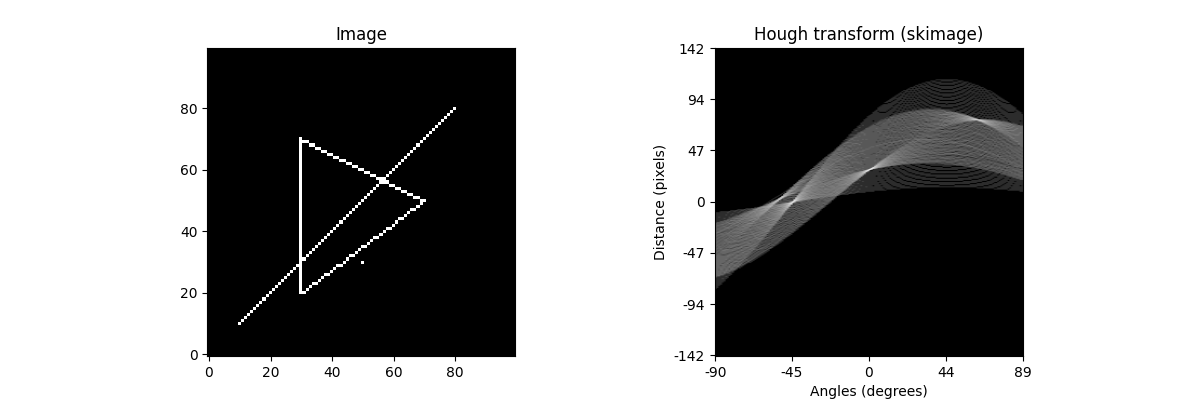

In [10]:
from skimage.transform import hough_line, resize
import matplotlib.pyplot as plt
%matplotlib ipympl
import numpy as np

steps = lambda p,q : max(map(lambda x,y: abs(x-y), p, q))+1
coords = lambda p,q,s : tuple([np.linspace(x,y,s,dtype=np.uint16) for x,y in zip(p,q)])

def point(img, p):
    """Insert a point in the black/white image at position p
    
    Args:
        img (ndarray): Input image.
        p (tuple): Coordinate of point.
    
    Returns:
    
    """
    img[p] = 1

def line(img, p, q):
    """Insert a line from p to q in the black/white image
    
    Args:
        img (ndarray): Input image.
        p (tuple): Coordinate of start position.
        q (tuple): Coordinate of end position.
    
    Returns:
    
    """
    img[coords(p,q,steps(p,q))] = 1

def polygon(img, vertices):
    """Insert a (closed) polygon given by a list of points into the black/white image
    
    Args:
        img (ndarray): Input image.
        vertices (list): List of coordinate tuples.
    
    Returns:
    
    """
    for p, q in zip(vertices, vertices[1:]+vertices[0:1]):
        line(img,p,q)

img = np.zeros((100,100))

# Add a point
point(img, (30, 50))

# Add a line
line(img, (10, 10), (80, 80))

# Add a polygon (triangle)
polygon(img, [(20, 30), (70, 30), (50, 70)])

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12,4))

plt.gray()
ax1.set_title('Image'); 
ax1.imshow(img, origin = 'lower')

out, angles, d = hough_line(img)

# scale output to quadratic image
out_resized = resize(out, (out.shape[0], out.shape[0]), anti_aliasing=True, preserve_range=True)
ax2.set_title('Hough transform (skimage)');
ax2.set_xlabel('Angles (degrees)')
ax2.set_ylabel('Distance (pixels)')
ax2.imshow(np.log(1 + out_resized), origin = 'lower', cmap='gray')

ax2.set_yticks(np.linspace(0, out.shape[0], 7))
ax2.set_yticklabels((-1 * np.linspace(d[-1], d[0], 7)).astype(int))
ax2.set_xticks(np.linspace(0, out.shape[0], 5))
ax2.set_xticklabels(np.linspace(np.rad2deg(angles[0]), np.rad2deg(angles[-1]), 5).astype(int))


plt.show()

**d)** The following code block implements an interactive Hough transform, in which you can either draw points or lines and can see the resulting Hough transform immediately. Draw different shapes of points or lines and check the resulting Hough transform. Try to predict the outcome of the transformation!

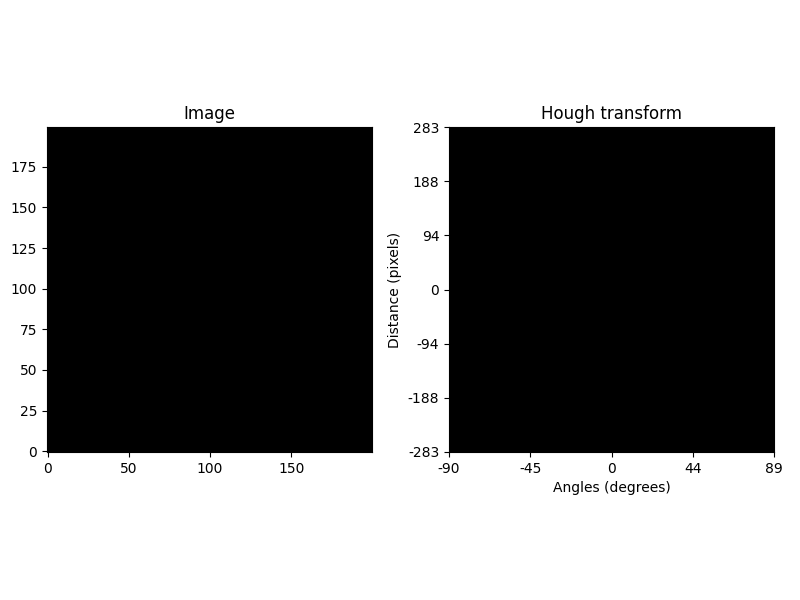

In [108]:
%matplotlib ipympl
from skimage.transform import hough_line, resize
import matplotlib.pyplot as plt
import numpy as np

# True if two mouse clicks should draw a line, false if single clicks draw points
lines = True

steps = lambda p,q : max(map(lambda x,y: abs(x-y), p, q))+1
coords = lambda p,q,s : tuple([np.linspace(x,y,s,dtype=np.uint16) for x,y in zip(p,q)])
img = np.zeros((200,200))


def line(img, p, q):
    """Insert a line from p to q in the black/white image
    
    Args:
        img (ndarray): Input image.
        p (tuple): Coordinate of start position.
        q (tuple): Coordinate of end position.
    
    Returns:
    
    """
    img[coords(p,q,steps(p,q))] = 1
    

def disp_and_comp():
    """Computes Line Hough transform; displays image and result
    
    Args:
    
    Returns:
    
    """
    ax1.imshow(img, origin = 'lower', cmap='gray')
    
    out, angles, d = hough_line(img)
    
    out_resized = resize(out, (out.shape[0], out.shape[0]), anti_aliasing=True, preserve_range=True)
    ax2.imshow(np.log(1 + out_resized), origin = 'lower', cmap='gray')
    ax2.set_yticks(np.linspace(0, out.shape[0], 7))
    ax2.set_yticklabels((-1 * np.linspace(d[-1], d[0], 7)).astype(int))
    ax2.set_xticks(np.linspace(0, out.shape[0], 5))
    ax2.set_xticklabels(np.linspace(np.rad2deg(angles[0]), np.rad2deg(angles[-1]), 5).astype(int))
    
    fig.canvas.draw()

    
first_point = True
p1 = (0,0)
def on_press(event):
    """Draws either line or point and calls disp_and_comp
    
    Reacts to mouse clicks. Draws either point at mouse
    position and computes Hough transform or draws line
    between first and second mouse click and then computes
    hough transfom.
    
    Args:
        event (event): Mouseevent.
    
    Returns:
    
    """
    global p1, first_point
    y = int(event.xdata)
    x = int(event.ydata)
    
    if (lines):
        if (first_point):
            p1 = (x,y)
            img[x, y] = 255
            first_point = False
        else:
            line(img,p1,(x,y)) 
            first_point = True
        disp_and_comp()
    else:
        img[x, y] = 255
        disp_and_comp()   

fig = plt.figure(figsize=(8, 6))

ax1 = fig.add_subplot(121)
plt.title('Image')

ax2 = fig.add_subplot(122)
plt.title('Hough transform');
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')
plt.tight_layout()
plt.axis('square')

disp_and_comp()
cnc = fig.canvas.mpl_connect('button_press_event', on_press)

## Assignment 3: Implementing Hough transform (5 points)

In [19]:
# Auxiliary functions for this exercise
import numpy as np
from skimage.transform import hough_line, resize

steps = lambda p,q : max(map(lambda x,y: abs(x-y), p, q))+1
coords = lambda p,q,s : tuple([np.linspace(x,y,s,dtype=np.uint16) for x,y in zip(p,q)])

def point(img, p):
    """Insert a point in the black/white image at position p
    
    Args:
        img (ndarray): Input image.
        p (tuple): Coordinate of point.
    
    Returns:
    
    """
    img[p] = 1

def line(img, p, q):
    """Insert a line from p to q in the black/white image
    
    Args:
        img (ndarray): Input image.
        p (tuple): Coordinate of start position.
        q (tuple): Coordinate of end position.
    
    Returns:
    
    """
    img[coords(p,q,steps(p,q))] = 1

def polygon(img, vertices):
    """Insert a (closed) polygon given by a list of points into the black/white image
    
    Args:
        img (ndarray): Input image.
        vertices (list): List of coordinate tuples.
    
    Returns:
    
    """
    for p, q in zip(vertices, vertices[1:]+vertices[0:1]):
        line(img,p,q)

**a)** Implement your own version of linear Hough transform and compare the results with the function `skimage.transform.hough_line`.

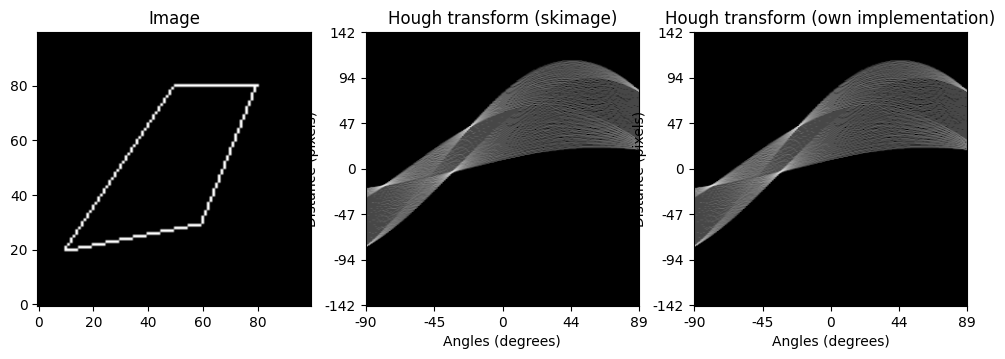

In [26]:
from skimage.transform import hough_line
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def my_hough_line(img, angles=180):
    """
    Apply linear Hough transform to the given image.
    
    Args:
        img (numpy.ndarray): The binary image to transform
        angles (int): The number of angles to consider.
    Result:
        accumulator (numpy.ndarray): The accumulator space.
    """
     # Parameters: Rho (distance), Theta (angle)
    diag_len = int(np.sqrt(img.shape[0]**2 + img.shape[1]**2))  # Diagonal length of the image
    
    # Create a range for Rho values, from negative to positive diagonal length
    rho_range = np.linspace(-diag_len, diag_len, img.shape[0])  # Rho range
    
    # Create a range for Theta values, from -90 to +90 degrees
    theta_range = np.linspace(-np.pi / 2, np.pi / 2, angles)  # Theta range
    
    # Get the indices of all edge points in the image (non-zero pixels)
    y_indices, x_indices = np.where(img > 0)

    # Vectorized calculation of Rho for all edge points and all angles
    # Calculate Rho for each edge point and each angle simultaneously
    # x * cos(theta) + y * sin(theta)
    cos_theta = np.cos(theta_range)
    sin_theta = np.sin(theta_range)
    
    # Broadcasting the x and y coordinates of all points with the theta values
    rho_matrix = np.outer(x_indices, cos_theta) + np.outer(y_indices, sin_theta)
    
    # Find the closest Rho values from rho_range using broadcasting
    rho_idx = np.argmin(np.abs(rho_matrix[:, :, np.newaxis] - rho_range), axis=2)

    # Initialize the accumulator (2D array)
    accumulator = np.zeros((len(rho_range), len(theta_range)), dtype=int)
    
    # For each Rho, Theta combination, increment the accumulator
    # Accumulate the votes for Rho, Theta pairs
    for r_idx, t_idx in zip(rho_idx.flatten(), np.tile(np.arange(len(theta_range)), len(x_indices))):
        accumulator[r_idx, t_idx] += 1
    
    return accumulator, rho_range, theta_range

img = np.zeros((100,100))

# You may try different paintings here:
#point(img, (10,10))
#line(img,(10,20),(70,20))
polygon(img,[(20,10),(80,50),(80,80),(30,60)])


fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(12,4))
plt.gray()

# original image
ax1.set_title('Image'); 
ax1.imshow(img, origin = 'lower')

# skimage
out, angles, d = hough_line(img)

out_resized = resize(out, (out.shape[0], out.shape[0]), anti_aliasing=True, preserve_range=True)
ax2.set_title('Hough transform (skimage)');
ax2.set_xlabel('Angles (degrees)')
ax2.set_ylabel('Distance (pixels)')
ax2.imshow(np.log(1 + out_resized), origin = 'lower', cmap='gray')
ax2.set_yticks(np.linspace(0, out.shape[0], 7))
ax2.set_yticklabels((-1 * np.linspace(d[-1], d[0], 7)).astype(int))
ax2.set_xticks(np.linspace(0, out.shape[0], 5))
ax2.set_xticklabels(np.linspace(np.rad2deg(angles[0]), np.rad2deg(angles[-1]), 5).astype(int))

# own implementation
my_out = my_hough_line(img)

my_out_resized = resize(out, (out.shape[0], out.shape[0]), anti_aliasing=True, preserve_range=True)
ax3.set_title('Hough transform (own implementation)');
ax3.set_xlabel('Angles (degrees)')
ax3.set_ylabel('Distance (pixels)')
ax3.imshow(np.log(1 + my_out_resized), origin = 'lower', cmap='gray')
ax3.set_yticks(np.linspace(0, out.shape[0], 7))
ax3.set_yticklabels((-1 * np.linspace(d[-1], d[0], 7)).astype(int))
ax3.set_xticks(np.linspace(0, out.shape[0], 5))
ax3.set_xticklabels(np.linspace(np.rad2deg(angles[0]), np.rad2deg(angles[-1]), 5).astype(int))

plt.show()

**b)** Under which conditions is (linear) Hough transform invertible? Try to implement an inverse linear Hough transform. 

You could create a line for each point in accumulator space by doing the following: Compute angle and distance of the line represented by the current point in accumulator space. Add the value of this point to all image pixels which belong to the corresponding line. Finally you could threshold the image. 

However, other solution are feasible, too.


The linear Hough transform is invertible when each line in the image has a unique representation in the Hough space, there is no noise, and no parallel lines exist that would lead to ambiguous parameter mappings.

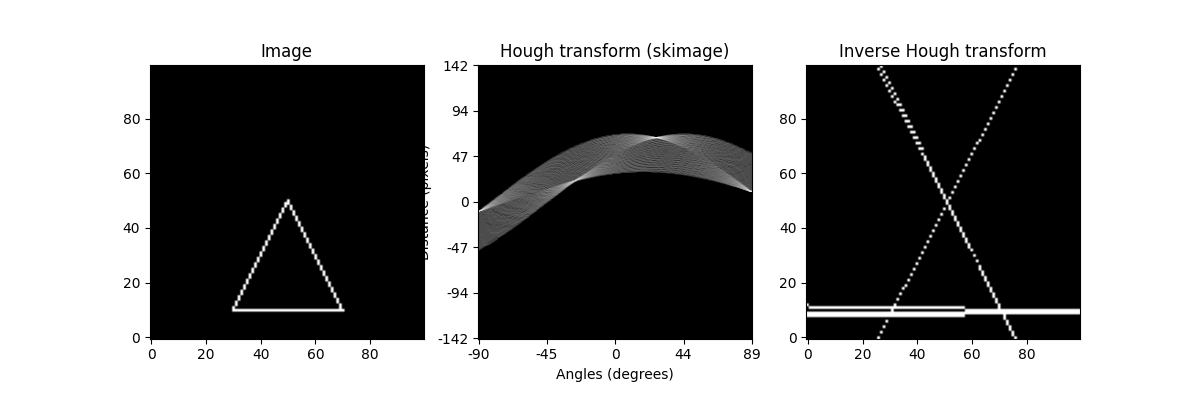

In [94]:
%matplotlib ipympl 
from skimage.transform import hough_line
import matplotlib.pyplot as plt
import numpy as np


def my_inverse_hough_line(accumulator, shape, threshold=35):
    """Compute an inverse Hough transform, i.e. compute the image from the accumulator space.
    
    Args:
        accumulator (numpy.ndarray)
        shape (tuple): The shape (dimensions) of the image to be created

    Result:
        img (numpy.ndarray): The image created from the accumulator space.
    """
    img = np.zeros(shape, np.uint64)
    
    # Get the angles and distance ranges based on the accumulator
    rho_max, theta_max = accumulator.shape
    diag_len = int(np.sqrt(shape[0]**2 + shape[1]**2))
    
    # Iterate through the accumulator space to find significant points
    for rho_idx in range(rho_max):
        for theta_idx in range(theta_max):
            if accumulator[rho_idx, theta_idx] > threshold:
                # Convert accumulator indices back to rho, theta
                rho = rho_idx - diag_len  # convert back to the correct distance
                theta = theta_idx * np.pi / theta_max - np.pi / 2  # convert back to radians
                
                # Compute the (x, y) coordinates of the line in image space
                for x in range(shape[1]):
                    y = int((rho - x * np.cos(theta)) / np.sin(theta))
                    if 0 <= y < shape[0]:
                        img[y, x] = 1  # Mark the points that lie on the line in the image
                        
    return img

img = np.zeros((100,100))

#point(img, (10,10))
#line(img,(10,20),(70,20))
#line(img,(20,10),(20,70))
polygon(img,[(10,30),(50,50),(10,70)])

plt.figure(figsize=(12, 4))
plt.gray()
plt.subplot(1,3,1) ; plt.title('Image'); plt.imshow(img, origin = 'lower')

out, angles, d = hough_line(img)
out_resized = resize(out, (out.shape[0], out.shape[0]), anti_aliasing=True, preserve_range=True)
ax = plt.subplot(1,3,2) ; plt.title('Hough transform (skimage)');
ax.set_title('Hough transform (skimage)');
ax.set_xlabel('Angles (degrees)')
ax.set_ylabel('Distance (pixels)')
ax.imshow(np.log(1 + out_resized), origin = 'lower', cmap='gray')
ax.set_yticks(np.linspace(0, out.shape[0], 7))
ax.set_yticklabels((-1 * np.linspace(d[-1], d[0], 7)).astype(int))
ax.set_xticks(np.linspace(0, out.shape[0], 5))
ax.set_xticklabels(np.linspace(np.rad2deg(angles[0]), np.rad2deg(angles[-1]), 5).astype(int))

img2 = my_inverse_hough_line(out, img.shape,threshold=35)
plt.subplot(1,3,3) ; plt.title('Inverse Hough transform');
plt.imshow(img2, origin = 'lower')
plt.show()

## Assignment 4: Circular Hough (5 points)

**a)** Explain the idea of circular Hough transform. How many dimensions does the accumulator space have and what do they represent? What practical problems do you expect when computing circular Hough transform?

The **Circular Hough Transform** detects circles in an image by representing circles with three parameters: the center coordinates $(a, b)$ and radius $r$. 

The **accumulator space** has three dimensions:
- $a$: x-coordinate of the circle's center
- $b$: y-coordinate of the circle's center
- $r$: radius of the circle

Each image point votes for possible circles, and the highest votes correspond to detected circles.

### Practical Issues
- **Computational cost**: A 3D accumulator space can be large, requiring significant memory and processing power
- **Ambiguities**: Overlapping circles can complicate detection
- **Radius choice**: Selecting the right range for $r$ is critical to avoid false positives or missed circles









**b)** Now implement circular hough transform. First think how the accumulator space should be represented. You may provide an additional parameter to only look for circles of a given radius (or a range of radii). Then apply it to the image `xmas.png` to detect the balls. Mark them in the original image. (Bonus task: also detect the presents using linear Hough transform).

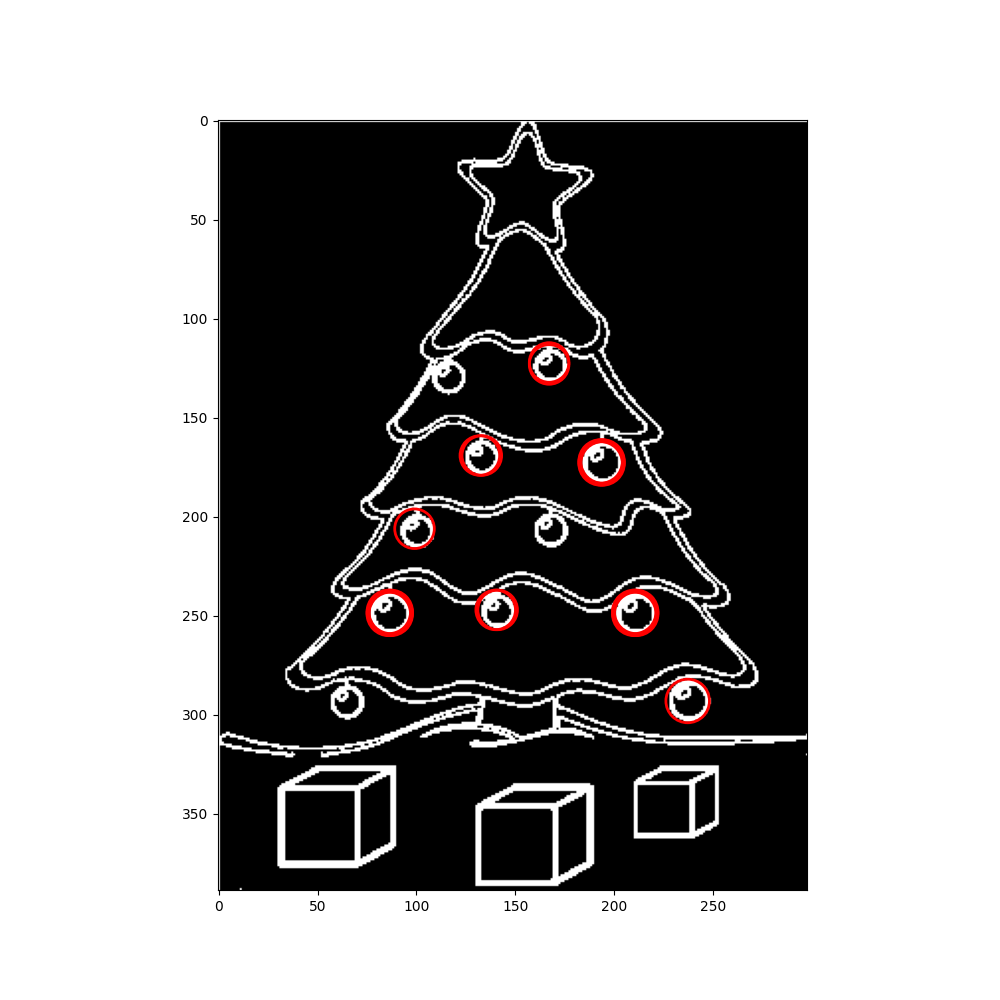

In [95]:
%matplotlib ipympl
from skimage import feature
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
from imageio.v3 import imread

def circular_hough_transform(img, min_radius=10, max_radius=50, steps=100):
    """Implement Circular Hough Transform without for loops."""
    # Convert image to grayscale if it is RGB
    if len(img.shape) == 3:
        img = rgb2gray(img)
        
    # Edge detection (Canny)
    edges = feature.canny(img, sigma=2)
    
    # Get coordinates of edge pixels
    edge_coords = np.column_stack(np.where(edges))  # (y, x)
    
    # Generate radii and angles
    radii = np.arange(min_radius, max_radius + 1)
    angles = np.linspace(0, 2 * np.pi, steps, endpoint=False)
    
    # Prepare the accumulator space
    height, width = img.shape
    accumulator = np.zeros((height, width, len(radii)), dtype=int)
    
    # X and Y coordinates of the edge pixels (y, x)
    y_coords, x_coords = edge_coords[:, 0], edge_coords[:, 1]

    # Compute potential circle centers for each edge pixel and radius
    for r_idx, r in enumerate(radii):
        # Calculate x and y offsets for all angles in parallel using broadcasting
        x_offsets = r * np.cos(angles)
        y_offsets = r * np.sin(angles)
        
        # Broadcast and calculate possible centers (a, b) for each edge pixel and radius
        a = (x_coords[:, np.newaxis] - x_offsets).astype(np.int32)
        b = (y_coords[:, np.newaxis] - y_offsets).astype(np.int32)

        # Clip the values to ensure they are within bounds (image dimensions)
        a = np.clip(a, 0, width - 1)
        b = np.clip(b, 0, height - 1)
        
        # Vote in the accumulator
        np.add.at(accumulator, (b, a, r_idx), 1)
    
    return accumulator

def detect_circles(accumulator, threshold=50):
    """Detect circles from the accumulator."""
    circles = []
    # Iterate over the accumulator to find local maxima (circles)
    for r in range(accumulator.shape[2]):
        for y in range(accumulator.shape[0]):
            for x in range(accumulator.shape[1]):
                if accumulator[y, x, r] > threshold:
                    circles.append((x, y, r + 10))  # (center x, center y, radius)
    return circles

# Load the image
img = imread('images/xmas.png')

# Apply Circular Hough Transform
accumulator = circular_hough_transform(img, min_radius=10, max_radius=50, steps=100)

# Detect circles
circles = detect_circles(accumulator, threshold=50)

# Plot results
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)
for (x, y, r) in circles:
    # Ensure the circle is fully within the image bounds
    if x - r >= 0 and x + r < img.shape[1] and y - r >= 0 and y + r < img.shape[0]:
        # Draw circle on the original image
        circ = plt.Circle((x, y), r, color='r', fill=False, linewidth=2)
        ax.add_patch(circ)
plt.show()


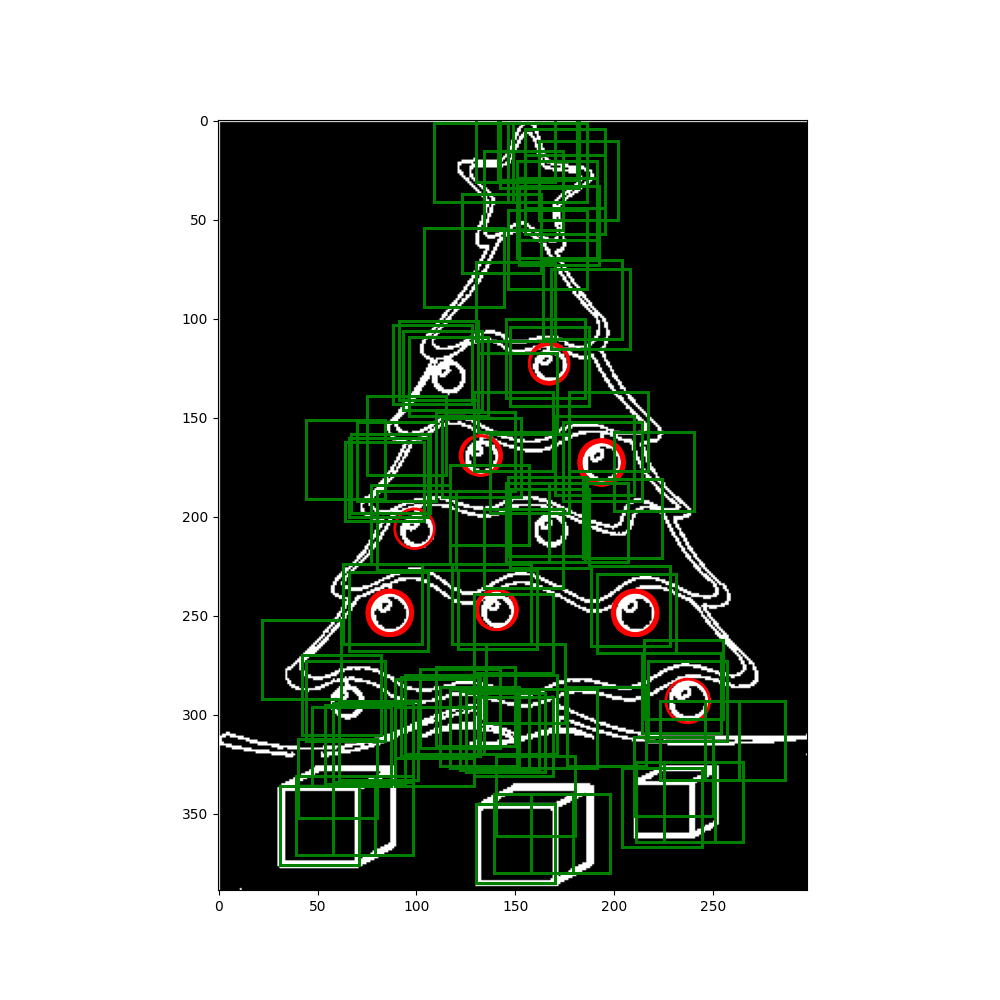

In [107]:
%matplotlib ipympl
from skimage import feature, measure
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
from imageio.v3 import imread

def circular_hough_transform(img, min_radius=10, max_radius=50, steps=100):
    """Implement Circular Hough Transform."""
    if len(img.shape) == 3:
        img = rgb2gray(img)
        
    edges = feature.canny(img, sigma=2)
    edge_coords = np.column_stack(np.where(edges))  # (y, x)
    
    radii = np.arange(min_radius, max_radius + 1)
    angles = np.linspace(0, 2 * np.pi, steps, endpoint=False)
    
    height, width = img.shape
    accumulator = np.zeros((height, width, len(radii)), dtype=int)
    
    y_coords, x_coords = edge_coords[:, 0], edge_coords[:, 1]
    
    for r_idx, r in enumerate(radii):
        x_offsets = r * np.cos(angles)
        y_offsets = r * np.sin(angles)
        
        a = (x_coords[:, np.newaxis] - x_offsets).astype(np.int32)
        b = (y_coords[:, np.newaxis] - y_offsets).astype(np.int32)
        
        a = np.clip(a, 0, width - 1)
        b = np.clip(b, 0, height - 1)
        
        np.add.at(accumulator, (b, a, r_idx), 1)
    
    return accumulator

def detect_circles(accumulator, threshold=50):
    """Detect circles from the accumulator."""
    return [(x, y, r + 10) for r in range(accumulator.shape[2])
            for y in range(accumulator.shape[0])
            for x in range(accumulator.shape[1])
            if accumulator[y, x, r] > threshold]

def detect_rectangles(img, threshold=50):
    """Detect rectangles (2D projections of quads) using contour detection."""
    img_binary = img > 0
    contours = measure.find_contours(img_binary, level=0.5)
    
    rectangles = []
    for contour in contours:
        contour = np.array(contour)
        if len(contour) >= 4:  # Looking for contours with at least 4 points
            contour = contour.reshape((-1, 2))  # Reshape for easier access
            
            # Check if the contour forms a rectangle: sides should be nearly perpendicular
            for i in range(len(contour)):
                # Get vectors for consecutive sides
                p1, p2 = contour[i], contour[(i + 1) % len(contour)]
                p3, p4 = contour[(i + 1) % len(contour)], contour[(i + 2) % len(contour)]
                
                # Compute vector directions
                v1 = p2 - p1
                v2 = p4 - p3
                
                # Check if vectors are orthogonal (dot product ~ 0)
                if np.isclose(np.dot(v1, v2), 0, atol=5):
                    rect_center = np.mean(contour, axis=0)
                    rectangles.append((int(rect_center[1]), int(rect_center[0])))  # (x, y) center
    return rectangles

# Load the image
img = imread('images/xmas.png')

# Apply Circular Hough Transform
accumulator = circular_hough_transform(img, min_radius=10, max_radius=50, steps=100)

# Detect circles
circles = detect_circles(accumulator, threshold=50)

# Detect rectangles (quads)
rectangles = detect_rectangles(img,threshold=2)

# Plot results
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)

# Draw detected circles
for (x, y, r) in circles:
    if x - r >= 0 and x + r < img.shape[1] and y - r >= 0 and y + r < img.shape[0]:
        circ = plt.Circle((x, y), r, color='r', fill=False, linewidth=2)
        ax.add_patch(circ)

# Draw detected rectangles (quads)
for (x, y) in rectangles:
    ax.add_patch(plt.Rectangle((x-20, y-20), 40, 40, linewidth=2, edgecolor='g', facecolor='none'))

plt.show()